<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/15-MissingNumericalData/mean_median_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Using Pandas

In [ ]:
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [ ]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train.head()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


## Check whether it doesn't effect the Variance significantly

In [ ]:
print("Original Age variance:", X_train['Age'].var())
print("Mean imputed Age variance:", X_train['Age_mean'].var())
print("Median imputed Age variance:", X_train['Age_median'].var())
print("\n")
print("Original Fare variance:", X_train['Fare'].var())
print("Mean imputed Fare variance:", X_train['Fare_mean'].var())
print("Median imputed Fare variance:", X_train['Fare_median'].var())

Original Age variance: 210.2517072477438
Mean imputed Age variance: 168.8519336687225
Median imputed Age variance: 169.20731007048096


Original Fare variance: 2761.031434948639
Mean imputed Fare variance: 2621.2323749512393
Median imputed Fare variance: 2637.01248167777


Notice the change in variance as it shrinks, because we make the imputed values equal to the mean, reducing the distance between mean and the values.

## Checking the changes in PDF

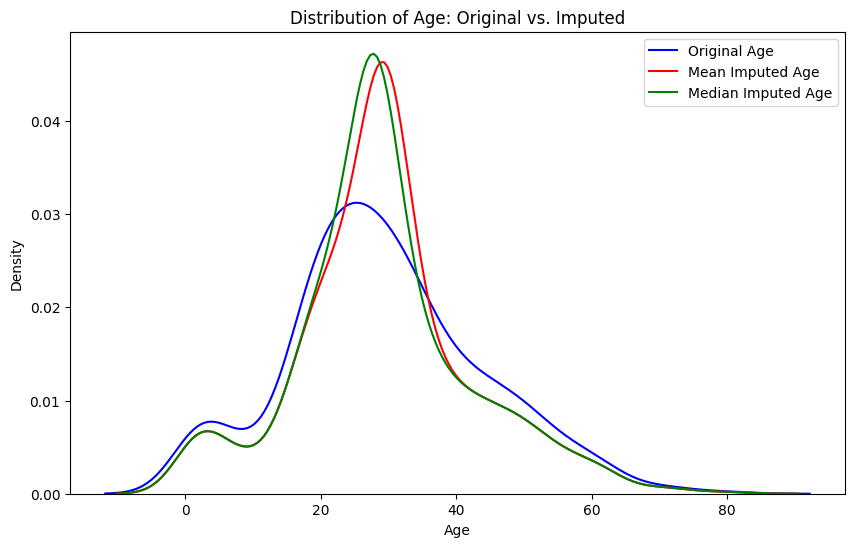

In [ ]:
# Plot for Age
plt.figure(figsize=(10, 6))
sns.kdeplot(X_train['Age'], label='Original Age', color='blue')
sns.kdeplot(X_train['Age_mean'], label='Mean Imputed Age', color='red')
sns.kdeplot(X_train['Age_median'], label='Median Imputed Age', color='green')
plt.title('Distribution of Age: Original vs. Imputed')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

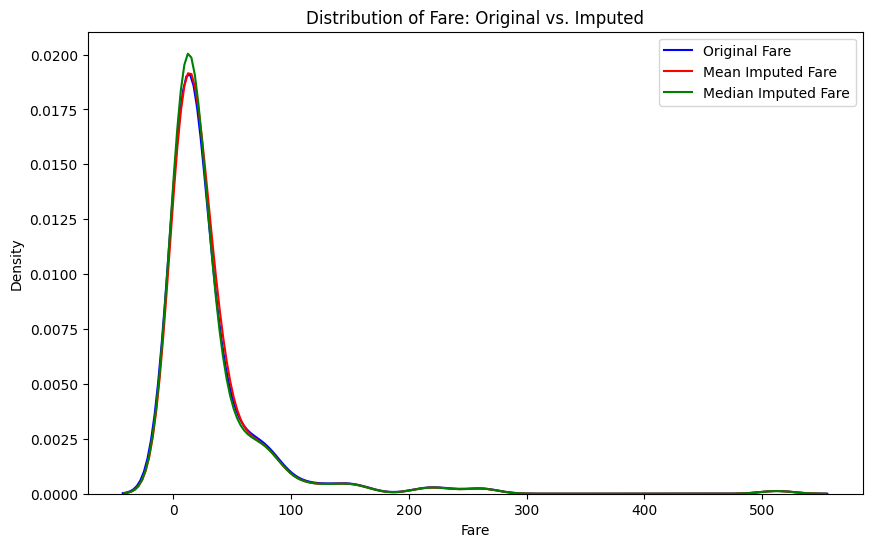

In [ ]:
# Plot for Fare
plt.figure(figsize=(10, 6))
sns.kdeplot(X_train['Fare'], label='Original Fare', color='blue')
sns.kdeplot(X_train['Fare_mean'], label='Mean Imputed Fare', color='red')
sns.kdeplot(X_train['Fare_median'], label='Median Imputed Fare', color='green')
plt.title('Distribution of Fare: Original vs. Imputed')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

## Checking the interaction among other columns

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


## Checking the Ouliers

<Axes: >

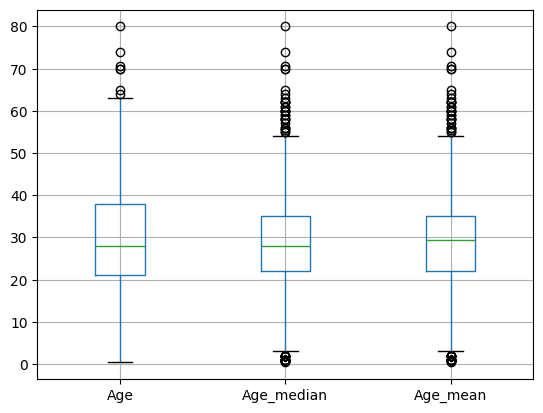

In [ ]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

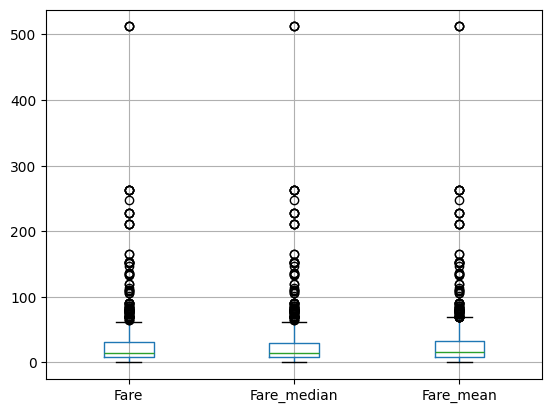

In [ ]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Using Sklearn

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [ ]:
trf = ColumnTransformer(transformers=[
    ('mean_age', imputer1, ['Age']),
    ('median_fare', imputer2, ['Fare']),
], remainder='passthrough')

In [ ]:
X_train.drop(['Age_median', 'Age_mean', 'Fare_median', 'Fare_mean'], axis=1, inplace=True)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
pd.DataFrame(X_train_transformed, columns=X_test.columns).head()

,Age,Fare,Family
0,45.5,28.5000,0.0
1,23.0,13.0000,0.0
2,32.0,7.9250,0.0
3,26.0,7.8542,1.0
4,6.0,31.2750,6.0


In [ ]:
X_test_transformed = trf.transform(X_test)
pd.DataFrame(X_test_transformed, columns=X_test.columns).head()

,Age,Fare,Family
0,29.498846,15.2458,2.0
1,31.000000,10.5000,0.0
2,20.000000,7.9250,0.0
3,6.000000,33.0000,1.0
4,14.000000,11.2417,1.0
